Data source: https://www.kaggle.com/datasets/aadarshvelu/aids-virus-infection-prediction/data

# Standard Import

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split as tts
import seaborn as sb

In [78]:
!wget https://raw.githubusercontent.com/yodhasu/Machine-Learning/main/AIDS%20Classification/AIDS_Classification.csv

--2024-06-04 06:39:33--  https://raw.githubusercontent.com/yodhasu/Machine-Learning/main/AIDS%20Classification/AIDS_Classification.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 142796 (139K) [text/plain]
Saving to: ‘AIDS_Classification.csv.3’

AIDS_Classification 100%[===================>] 139.45K  --.-KB/s    in 0.03s   

2024-06-04 06:39:33 (4.49 MB/s) - ‘AIDS_Classification.csv.3’ saved [142796/142796]



# EDA

In [79]:
df = pd.read_csv('AIDS_Classification.csv')
df.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,948,2,48,89.8128,0,0,0,100,0,0,...,0,1,0,1,0,422,477,566,324,0
1,1002,3,61,49.4424,0,0,0,90,0,1,...,1,3,0,1,0,162,218,392,564,1
2,961,3,45,88.4520,0,1,1,90,0,1,...,1,3,0,1,1,326,274,2063,1893,0
3,1166,3,47,85.2768,0,1,0,100,0,1,...,1,3,0,1,0,287,394,1590,966,0
4,1090,0,43,66.6792,0,1,0,100,0,1,...,1,3,0,0,0,504,353,870,782,0


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      2139 non-null   int64  
 1   trt       2139 non-null   int64  
 2   age       2139 non-null   int64  
 3   wtkg      2139 non-null   float64
 4   hemo      2139 non-null   int64  
 5   homo      2139 non-null   int64  
 6   drugs     2139 non-null   int64  
 7   karnof    2139 non-null   int64  
 8   oprior    2139 non-null   int64  
 9   z30       2139 non-null   int64  
 10  preanti   2139 non-null   int64  
 11  race      2139 non-null   int64  
 12  gender    2139 non-null   int64  
 13  str2      2139 non-null   int64  
 14  strat     2139 non-null   int64  
 15  symptom   2139 non-null   int64  
 16  treat     2139 non-null   int64  
 17  offtrt    2139 non-null   int64  
 18  cd40      2139 non-null   int64  
 19  cd420     2139 non-null   int64  
 20  cd80      2139 non-null   int6

In [81]:
# sb.pairplot(df) <- optional

In [82]:
for i in df:
  print(df[i].value_counts())

time
1087    34
1088    24
1154    18
1091    16
1090    16
        ..
303      1
816      1
174      1
651      1
465      1
Name: count, Length: 713, dtype: int64
trt
3    561
0    532
2    524
1    522
Name: count, dtype: int64
age
33    111
32    109
30    109
29    106
31    105
37    100
27     98
35     98
36     94
39     91
28     90
34     90
38     86
40     72
41     63
26     60
42     58
45     55
43     52
25     51
44     42
24     33
48     33
47     32
46     28
49     26
23     26
22     22
50     20
21     19
20     17
51     11
52     11
54     11
59      8
55      8
53      8
16      7
19      7
57      7
18      7
14      6
63      6
58      5
62      5
56      5
17      4
13      3
12      3
15      3
60      3
65      3
67      2
70      2
64      2
61      2
68      2
66      1
69      1
Name: count, dtype: int64
wtkg
70.76160     26
77.11200     24
78.01920     23
73.02960     22
76.20480     20
             ..
127.70000     1
43.80000      1
71.85024      1


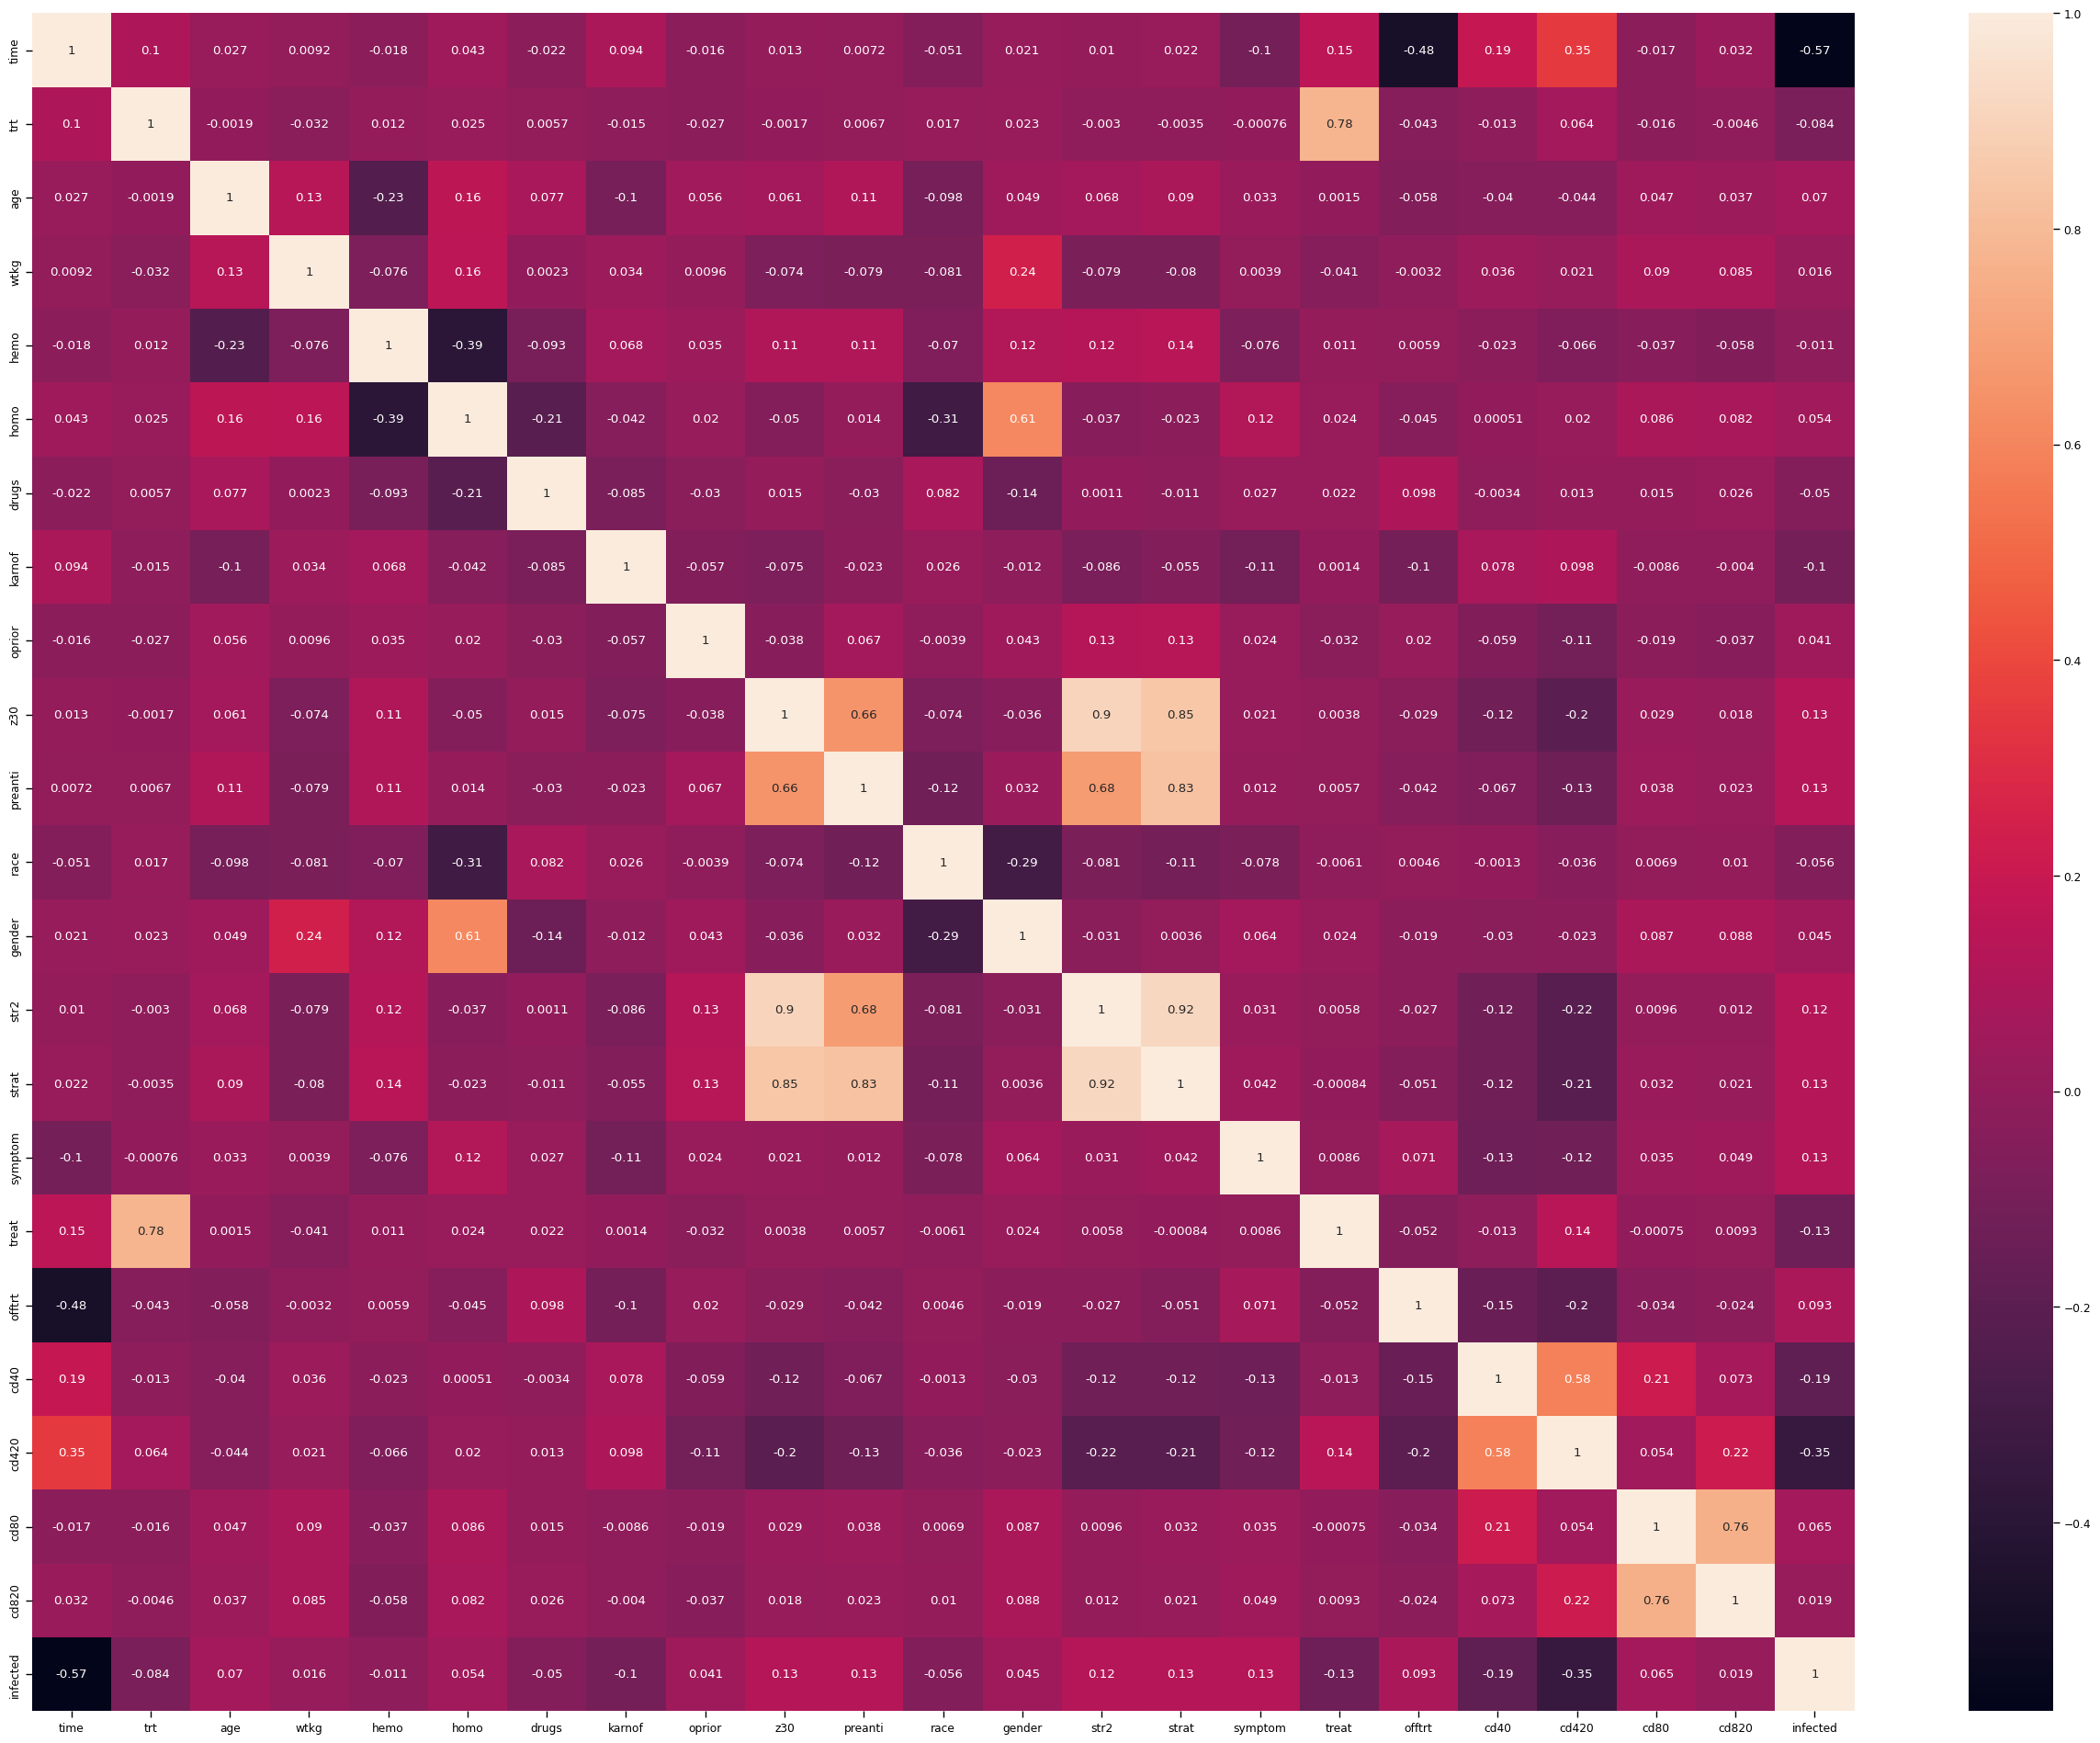

In [83]:
corr = df.corr()
sb.heatmap(corr, annot = True)
plt.rcParams["figure.figsize"] = (32,24)

# Model training

Idealy features are selected based on correlation matrix but I just pick random here

In [84]:
feats = df[['time', 'age', 'wtkg', 'hemo', 'homo', 'drugs', 'karnof', 'oprior', 'z30', 'race', 'symptom', 'preanti', 'cd40', 'cd420', 'cd80', 'cd820']]
target = df['infected']

Xtrain, Xtest, Ytrain, Ytest = tts(feats, target, test_size= 0.3, random_state=24)

## Decission Tree

In [85]:
dt = DecisionTreeClassifier()
dt_fit = dt.fit(Xtrain, Ytrain)

In [86]:
dt_pred = dt_fit.predict(Xtest)

print(metrics.classification_report(Ytest, dt_pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88       480
           1       0.65      0.68      0.67       162

    accuracy                           0.83       642
   macro avg       0.77      0.78      0.78       642
weighted avg       0.83      0.83      0.83       642



## Logistic Regression

In [87]:
lgr = LogisticRegression()
lgr_fit = lgr.fit(Xtrain, Ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [88]:
lgr_pred = lgr_fit.predict(Xtest)

print(metrics.classification_report(Ytest, lgr_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       480
           1       0.69      0.58      0.63       162

    accuracy                           0.83       642
   macro avg       0.78      0.75      0.76       642
weighted avg       0.82      0.83      0.82       642



Overall score for both models are good so using either one of them is fine

# Usage on random sample

Let's make a new person with randomly selected criteria to test either this person was infected with AIDS or not

In [89]:
rand_samp = {'time': [1069], 'age': [24], 'wtkg' : [45.78], 'hemo': 0, 'homo': 1, 'drugs': 1, 'karnof': 69, 'oprior': 0, 'z30': 0, 'race': 0, 'symptom': 1, 'preanti': 1120, 'cd40': 169, 'cd420': 420, 'cd80': 75, 'cd820': 169}

rand_df = pd.DataFrame(rand_samp, index=None)

In [90]:
rand_df

,time,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,race,symptom,preanti,cd40,cd420,cd80,cd820
0,1069,24,45.78,0,1,1,69,0,0,0,1,1120,169,420,75,169


# DT

In [91]:
dt_real = DecisionTreeClassifier().fit(feats, target)
dt_real_yhat = dt_real.predict(rand_df)

print(dt_real_yhat)

[0]


## LGR

In [92]:
lgr_real = LogisticRegression().fit(feats, target)
lgr_real_yhat = lgr_real.predict(rand_df)

print(lgr_real_yhat)

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
